<a href="https://colab.research.google.com/github/raudh1/ShellModels/blob/main/shell_model_prove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp

from scipy.integrate import complex_ode
from matplotlib import pyplot

In [2]:
N=12
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)


In [65]:
def shellmodel(t, u):
      nu=0.4e-3
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[3]=(1.+1.j)*6.e-3
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        cambiato da i-3
          #                                                                                       |
          #                                                                                       v
          res[i]=1j*(an[i-2]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i-2]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i-2]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


In [66]:
nu=0.4e-3
fn=(1.+1j)*6.e-3
eta=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta)

107.3053977160155


In [67]:
taueta=np.power(nu/epsilon,0.5)
print(taueta)

0.3415432999007084


In [86]:
Un=1e-2*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)
Un2=np.load('./Uf.npy')
Un2=Un2[:,-1]
#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(u0,0)
t1 = 3000
dt = 1e-2
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
      if (i%50000==0):
        print(np.mean(np.sum((np.transpose(a)*np.conj(np.transpose(a))).real,axis=0)))
        print(i)
Uf=np.transpose(a)
np.save('./Uf',Uf)

0.16442943132506443
50000
0.16134447876953814
100000
0.16159831355684903
150000
0.16611556097995547
200000
0.16702619862308563
250000
0.16590115899438188
300000


In [28]:
np.save('./Uf',Uf)

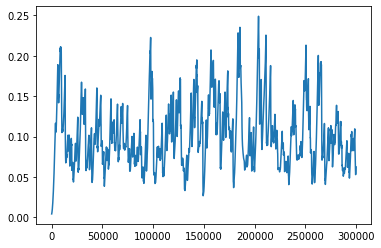

In [87]:
Uf2=Uf[2:-2]
Energy=np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot((Energy))
#plt.loglog()
#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(Energy[0],4.266e-5)
#plt.xlim(0,20)
plt.show()

In [88]:
Un[3]

(0.02+0.02j)

In [89]:
epsilon=2*np.real(np.mean(np.conj(Uf[3])*fn))


In [90]:
eta=np.power(nu**3/(epsilon),1/4.)
eta2=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta,1/eta2)

85.41318126263239 107.3053977160155


In [97]:
#print(np.mean((Uf*np.conj(Uf)),1),Uf[2].shape[:])

In [98]:
#print(Uf.shape[:],Un.shape[:])

In [99]:
#plt.plot(kn,(Un*np.conj(Un)).real,'bo')
#plt.loglog()
#plt.show()

In [91]:
#Uf_stat.shape[:]
#Uf_stat=Uf
Uf_stat=Uf[:,50000:]
#Uf_stat_old=np.load('./Uf_stat.npy')


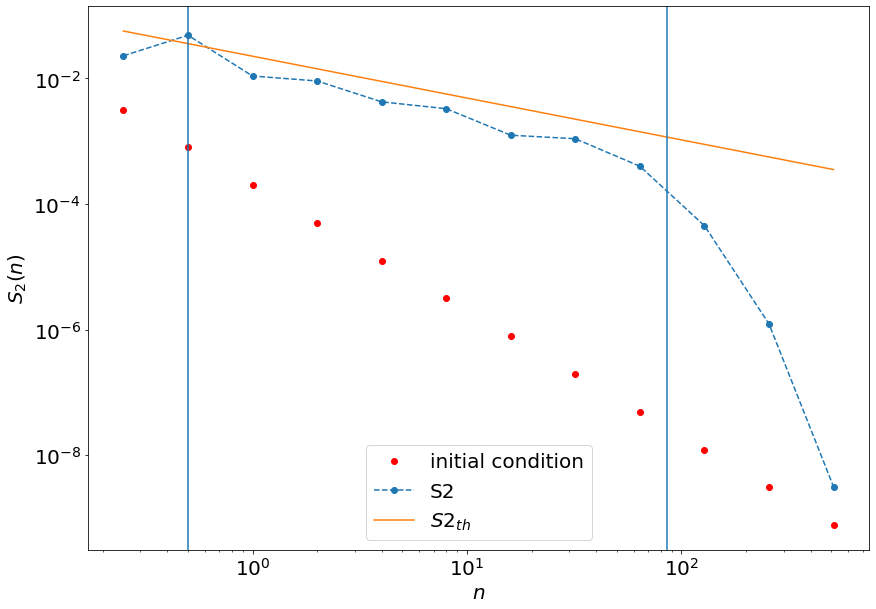

In [92]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2],'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf_stat*np.conj(Uf_stat)),1).real)[2:-2],'o--',label='S2')
#plt.plot(kn[2:-2],(np.mean((Uf_stat_old*np.conj(Uf_stat_old)),1).real)[2:-2],'o--',label='S2')

plt.plot(kn[2:-2],0.01e2*np.power(epsilon,2/3.)*kn[2:-2]**(-2/3.),label=r'$S2_{th}$')
plt.axvline(x=1/eta)
plt.axvline(x=kn[3])
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$S_2(n)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
#plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

In [29]:
S2

NameError: ignored

In [231]:
 np.save('./Uf_stat',Uf_stat)

**structure functions in all their beauty**

In [ ]:
a=np.array([1+1j,2,3,4])
a=np.abs(a)
print(np.mean(a**2))

7.75


In [ ]:
Uf[2:-2]

array([[ 0.004     +0.004j     ,  0.004     +0.004j     ,
         0.004     +0.004j     , ..., -1.99039955+0.62669066j,
        -1.99067503+0.62678449j, -1.99095047+0.62687831j],
       [ 0.00208   +0.00208j   ,  0.00216   +0.00216j   ,
         0.00224   +0.00224j   , ...,  4.25057481+4.2404344j ,
         4.25048286+4.24033968j,  4.25039093+4.24024498j],
       [ 0.001     +0.001j     ,  0.001     +0.001j     ,
         0.001     +0.001j     , ..., -0.42484897+0.87246206j,
        -0.42479227+0.87236201j, -0.42473549+0.87226181j],
       ...,
       [ 0.00000002+0.00000002j,  0.00000002+0.00000002j,
         0.00000002+0.00000002j, ..., -0.        -0.j        ,
        -0.        -0.j        , -0.        -0.j        ],
       [ 0.00000001+0.00000001j,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        -0.j        ,
         0.        -0.j        ,  0.        -0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

In [ ]:
print(len(np.mean(np.abs(Uf[2:-2].T),axis=0)))

20


In [59]:
Ufdisp=Uf[:]

In [60]:
Sdispari=[]
for i in range(N):
  
  a=np.imag(np.mean(((Ufdisp[i,:]*(Ufdisp[i+1,:])*np.conj((Ufdisp[i+2,:]))))))
  Sdispari.append(a)
print(Sdispari)

[-4.661162200448451e-07, -1.5829461200909962e-05, 9.740765735285651e-05, -0.00012477917142782188, -6.359064867902625e-08, -5.922658471846926e-10, 5.214619641746044e-12, 4.916356243646419e-13, 5.680722740018913e-14, 6.35594189667951e-15, 5.317376590749049e-16, 2.355457717553533e-17, 7.524156181828083e-19, 2.3618746097596007e-20, 7.383851707935093e-22, 2.299804083451902e-23, 7.081315856856326e-25, 2.0852531071210585e-26, 5.0836602540399185e-28, 4.939435008240434e-30]


[]

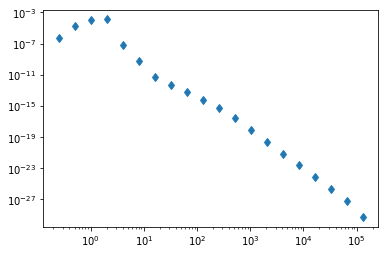

In [62]:
plt.plot(kn[2:-2],np.abs(Sdispari),'d')
plt.loglog()

In [30]:
plt.figure(figsize=(14,10))
Uf3=np.abs(Uf[2:-2])
S1=np.mean(((Uf3)),1)
S2=np.mean((Uf3)**2,1)
S4=np.mean((Uf3)**4,1)
S5=np.mean((Uf3)**5,1)
S6=np.mean((Uf3)**6,1)
S7=np.mean((Uf3)**7,1)
S8=np.mean((Uf3)**8,1)
S9=np.mean((Uf3)**9,1)
print(len(S2),len(S4)) 

12 12


<Figure size 1008x720 with 0 Axes>

In [31]:
Uf3[1,:].shape[:]

(100001,)

In [33]:
S2_2=np.mean(np.abs(Uf3[1,:]))
S2_2

0.20376173028873795

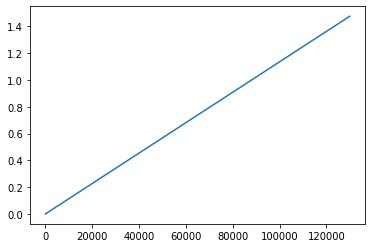

In [69]:
plt.plot(np.abs(Uf3[1,:]))


In [266]:
print((S1.shape[:]))

(20,)


In [253]:
def func(x, a, b, c):
    return a * np.power(x,b) +c

In [269]:
np.log2(knn[2])

2.0

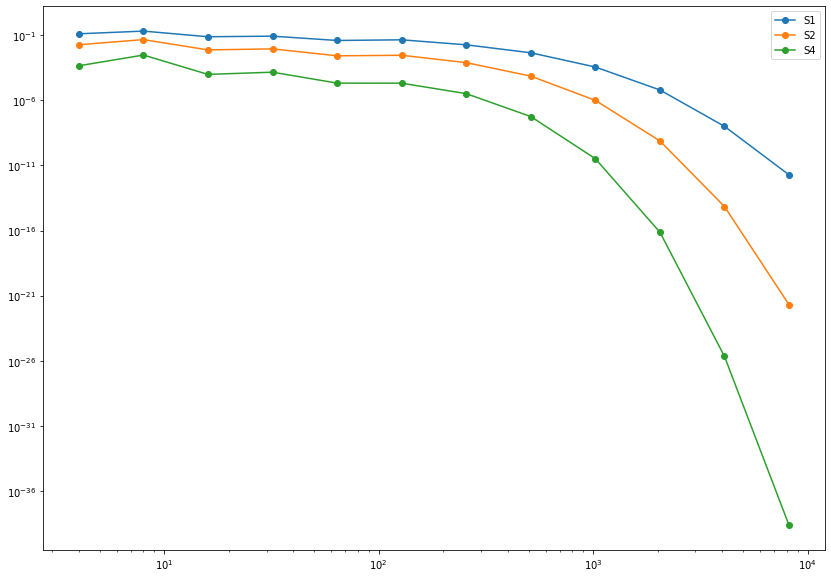

In [34]:
plt.figure(figsize=(14,10))

#plt.plot(kn[2:-2],S1,'o-',label='S1')
plt.plot((knn[2:-2]),(S1),'o-',label='S1')
plt.plot((knn[2:-2]),(S2),'o-',label='S2')
plt.plot((knn[2:-2]),(S4),'o-',label='S4')

#plt.plot((knn[2:-2]),knn[2:-2]*(np.abs(Sdispari)),'o-',label='S3')
#plt.plot((knn[2:-2]),(knn[2:-2]**(-1.)),'o-',label='k^-1')

#plt.plot(np.log2(knn[2:-2]),np.log2(S4),'o-',label='S4')
#plt.plot(knn[2:-2],kn[2:-2]**(-0.720),label='power law')
#plt.plot(knn[2:-2],kn[2:-2]**(-1.7),label='power law')

#plt.yscale('log')

#plt.plot(kn[2:-2],kn[2:-2]**0.00003242,'o-',label='k**-2')
#plt.plot(kn[2:-2],func(kn[2:-2], *popt))
#plt.plot(S3,'o-',label='S3')
#plt.plot(kn[2:-2],S4,'o-',label='S4')
#plt.plot(S5,'o-',label='S5')
#plt.plot(kn[2:-2],S6,'o-',label='S6')
#plt.plot(S7,'o-',label='S7')
#plt.plot(kn[2:-2],S8,'o-',label='S8')
#plt.plot(S9,'o-',label='S9')
#plt.xlim([1e-1,1])
#plt.ylim(1e-3,1e3)
plt.loglog()#basex=2, basey=2)
plt.legend()
plt.show()

In [35]:
S2

array([1.83099723e-02, 4.55088797e-02, 7.35174319e-03, 8.83363841e-03,
       2.57966462e-03, 2.85494146e-03, 7.74959876e-04, 7.14718096e-05,
       9.84856850e-07, 7.58982027e-10, 6.95603813e-15, 2.02010675e-22])

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, kn[2:-2],S2,bounds=(-5,[1,-2,1]))
popt

array([ 0.1909241 , -2.        ,  0.59000107])

In [73]:
np.set_printoptions(suppress=True)

np.round(S2, decimals=8, out=None)

array([0.00009967, 0.72494462, 0.00007771, 0.00011172, 0.00000019,
       0.00000003, 0.00000001, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
--- prove ---

SyntaxError: ignored

In [ ]:
import seaborn as sns